In [1]:
import nltk
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim 
import matplotlib.pyplot as plt

In [3]:
brown.sents()

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

## 1. Tokenize

In [4]:
corpus_tokenized = brown.sents()[:800]

## 2. Numericalize

### 2.1 Get all the uniques words

In [5]:
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized)))

In [6]:
vocabs

['L.',
 "didn't",
 'enterprise',
 'dead',
 'forecasts',
 'forest',
 'About',
 'segregation',
 'governments',
 'factor',
 'hike',
 'deaf',
 'candidates',
 'history',
 'world',
 'understates',
 'armed',
 '87-31',
 'origin',
 'dropping',
 '5.1',
 'times',
 "bill's",
 'around',
 'Laotians',
 'Ledford',
 'termed',
 'authorities',
 'ignored',
 'Scott',
 'Alan',
 'Massachusetts',
 'Orleans',
 'receiving',
 'completes',
 'team',
 'Station',
 'bid',
 'led',
 'Fulton',
 'saying',
 'Look',
 'December',
 'cease-fire',
 'wider',
 'pro-Communist',
 'tougher',
 'merchandising',
 'trims',
 'plans',
 'following',
 'vehicles',
 'cordial',
 'attempt',
 'case',
 'railroad',
 'several',
 'here',
 'families',
 '1960',
 'things',
 'Could',
 '30',
 'halfway',
 'Harlingen',
 'Feis',
 'Island',
 'ill',
 'reviewed',
 'guilty',
 'saving',
 'so-far',
 'cash',
 'Board',
 'looked',
 'Meanwhile',
 'Michigan',
 'negative',
 'love',
 'Weldon',
 'Association',
 'surveillance',
 'were',
 'quest',
 'defendants',
 'stays',

### 2.2 Add `<UNK>` at index 0

In [7]:
vocabs.insert(0,'<UNK>')

### 2.3 Create word2index dictionary

In [8]:
word2index = {v: idx for idx, v in enumerate(vocabs)}

In [9]:
word2index

{'<UNK>': 0,
 'L.': 1,
 "didn't": 2,
 'enterprise': 3,
 'dead': 4,
 'forecasts': 5,
 'forest': 6,
 'About': 7,
 'segregation': 8,
 'governments': 9,
 'factor': 10,
 'hike': 11,
 'deaf': 12,
 'candidates': 13,
 'history': 14,
 'world': 15,
 'understates': 16,
 'armed': 17,
 '87-31': 18,
 'origin': 19,
 'dropping': 20,
 '5.1': 21,
 'times': 22,
 "bill's": 23,
 'around': 24,
 'Laotians': 25,
 'Ledford': 26,
 'termed': 27,
 'authorities': 28,
 'ignored': 29,
 'Scott': 30,
 'Alan': 31,
 'Massachusetts': 32,
 'Orleans': 33,
 'receiving': 34,
 'completes': 35,
 'team': 36,
 'Station': 37,
 'bid': 38,
 'led': 39,
 'Fulton': 40,
 'saying': 41,
 'Look': 42,
 'December': 43,
 'cease-fire': 44,
 'wider': 45,
 'pro-Communist': 46,
 'tougher': 47,
 'merchandising': 48,
 'trims': 49,
 'plans': 50,
 'following': 51,
 'vehicles': 52,
 'cordial': 53,
 'attempt': 54,
 'case': 55,
 'railroad': 56,
 'several': 57,
 'here': 58,
 'families': 59,
 '1960': 60,
 'things': 61,
 'Could': 62,
 '30': 63,
 'halfway'

### 2.4 Create index2word dictionary

In [10]:
index2word = {v:k for k, v in word2index.items()}

In [11]:
index2word

{0: '<UNK>',
 1: 'L.',
 2: "didn't",
 3: 'enterprise',
 4: 'dead',
 5: 'forecasts',
 6: 'forest',
 7: 'About',
 8: 'segregation',
 9: 'governments',
 10: 'factor',
 11: 'hike',
 12: 'deaf',
 13: 'candidates',
 14: 'history',
 15: 'world',
 16: 'understates',
 17: 'armed',
 18: '87-31',
 19: 'origin',
 20: 'dropping',
 21: '5.1',
 22: 'times',
 23: "bill's",
 24: 'around',
 25: 'Laotians',
 26: 'Ledford',
 27: 'termed',
 28: 'authorities',
 29: 'ignored',
 30: 'Scott',
 31: 'Alan',
 32: 'Massachusetts',
 33: 'Orleans',
 34: 'receiving',
 35: 'completes',
 36: 'team',
 37: 'Station',
 38: 'bid',
 39: 'led',
 40: 'Fulton',
 41: 'saying',
 42: 'Look',
 43: 'December',
 44: 'cease-fire',
 45: 'wider',
 46: 'pro-Communist',
 47: 'tougher',
 48: 'merchandising',
 49: 'trims',
 50: 'plans',
 51: 'following',
 52: 'vehicles',
 53: 'cordial',
 54: 'attempt',
 55: 'case',
 56: 'railroad',
 57: 'several',
 58: 'here',
 59: 'families',
 60: '1960',
 61: 'things',
 62: 'Could',
 63: '30',
 64: 'half

## 3. Create a Co-occurrence matrix

### 3.1 Create a word counter

In [12]:
from collections import Counter
counter_word = Counter(flatten(corpus_tokenized))

In [13]:
counter_word

Counter({'The': 154,
         'Fulton': 14,
         'County': 19,
         'Grand': 1,
         'Jury': 1,
         'said': 126,
         'Friday': 4,
         'an': 61,
         'investigation': 4,
         'of': 563,
         "Atlanta's": 2,
         'recent': 6,
         'primary': 13,
         'election': 31,
         'produced': 1,
         '``': 171,
         'no': 27,
         'evidence': 6,
         "''": 162,
         'that': 171,
         'any': 16,
         'irregularities': 3,
         'took': 3,
         'place': 5,
         '.': 692,
         'jury': 22,
         'further': 8,
         'in': 342,
         'term-end': 1,
         'presentments': 1,
         'the': 1112,
         'City': 8,
         'Executive': 3,
         'Committee': 15,
         ',': 705,
         'which': 48,
         'had': 34,
         'over-all': 2,
         'charge': 5,
         'deserves': 1,
         'praise': 1,
         'and': 297,
         'thanks': 1,
         'Atlanta': 5,
         'for': 1

### 3.2 Create skipgrams

In [14]:
def create_skipgrams(corpus, window_size=1):
    skipgrams = []
    for sentence in corpus:
        sentence_length = len(sentence)
        for i in range(1, sentence_length-1): 
            center_word = sentence[i]
            outside_word = []
            for ws in range(window_size):
                ### check if it is outside of range of the list
                if i + 1 + ws < sentence_length:
                    outside_word.append(sentence[i+ws+1])
                if i - ws - 1 >= 0:
                    outside_word.append(sentence[(i - ws - 1)])
            for o in outside_word:
                skipgrams.append(((center_word, o)))
    return skipgrams

In [15]:
skipgrams = create_skipgrams(corpus_tokenized,2)

In [16]:
skipgrams

[('Fulton', 'County'),
 ('Fulton', 'The'),
 ('Fulton', 'Grand'),
 ('County', 'Grand'),
 ('County', 'Fulton'),
 ('County', 'Jury'),
 ('County', 'The'),
 ('Grand', 'Jury'),
 ('Grand', 'County'),
 ('Grand', 'said'),
 ('Grand', 'Fulton'),
 ('Jury', 'said'),
 ('Jury', 'Grand'),
 ('Jury', 'Friday'),
 ('Jury', 'County'),
 ('said', 'Friday'),
 ('said', 'Jury'),
 ('said', 'an'),
 ('said', 'Grand'),
 ('Friday', 'an'),
 ('Friday', 'said'),
 ('Friday', 'investigation'),
 ('Friday', 'Jury'),
 ('an', 'investigation'),
 ('an', 'Friday'),
 ('an', 'of'),
 ('an', 'said'),
 ('investigation', 'of'),
 ('investigation', 'an'),
 ('investigation', "Atlanta's"),
 ('investigation', 'Friday'),
 ('of', "Atlanta's"),
 ('of', 'investigation'),
 ('of', 'recent'),
 ('of', 'an'),
 ("Atlanta's", 'recent'),
 ("Atlanta's", 'of'),
 ("Atlanta's", 'primary'),
 ("Atlanta's", 'investigation'),
 ('recent', 'primary'),
 ('recent', "Atlanta's"),
 ('recent', 'election'),
 ('recent', 'of'),
 ('primary', 'election'),
 ('primary', '

In [17]:
co_matrix = Counter(skipgrams)
co_matrix

Counter({('Fulton', 'County'): 6,
         ('Fulton', 'The'): 1,
         ('Fulton', 'Grand'): 1,
         ('County', 'Grand'): 1,
         ('County', 'Fulton'): 6,
         ('County', 'Jury'): 1,
         ('County', 'The'): 1,
         ('Grand', 'Jury'): 1,
         ('Grand', 'County'): 1,
         ('Grand', 'said'): 1,
         ('Grand', 'Fulton'): 1,
         ('Jury', 'said'): 1,
         ('Jury', 'Grand'): 1,
         ('Jury', 'Friday'): 1,
         ('Jury', 'County'): 1,
         ('said', 'Friday'): 1,
         ('said', 'Jury'): 1,
         ('said', 'an'): 2,
         ('said', 'Grand'): 1,
         ('Friday', 'an'): 1,
         ('Friday', 'said'): 1,
         ('Friday', 'investigation'): 1,
         ('Friday', 'Jury'): 1,
         ('an', 'investigation'): 1,
         ('an', 'Friday'): 1,
         ('an', 'of'): 9,
         ('an', 'said'): 2,
         ('investigation', 'of'): 3,
         ('investigation', 'an'): 1,
         ('investigation', "Atlanta's"): 1,
         ('investigation

## 3. Weighting function f

In [18]:
def weighting(w_i, w_j, X_ik):   
    try:
        x_ij = X_ik[(w_i, w_j)]
    except:
        x_ij = 1 
    x_max = 100
    alpha = 0.75
    if x_ij < x_max:
        result = (x_ij/x_max) ** alpha
    else:
        result = 1 
        
    return result

In [19]:
w_i  = 'Legislature'
w_j  = 'next'
w_j2 = 'outgoing'

print(weighting(w_i, w_j, co_matrix))   
print(weighting(w_i, w_j2, co_matrix))

0.03162277660168379
0.0


In [20]:
#now apply this weighting to all possible pairs
from itertools import combinations_with_replacement

counter = {} #for keeping the co-occurrences
weighting_dic = {} #for keeping all the probability after passing through the weighting function

for bigram in combinations_with_replacement(vocabs, 2):  #we need to also think its reverse
    #if this bigram exists in co_matrix
    #we gonna add this to our co-occurence matrix
    if co_matrix.get(bigram) is not None:
        cooc = co_matrix[bigram]  #get the co-occurrence
        counter[bigram] = cooc + 1 #this is again basically label smoothing....(stability issues (especially when divide something))
        counter[(bigram[1], bigram[0])] = cooc + 1  #trick to get all pairs
    else: #otherwise, do nothing
        pass
    
    #apply the weighting function using this co-occurrence matrix thingy    
    weighting_dic[bigram] = weighting(bigram[0], bigram[1], counter)
    weighting_dic[(bigram[1], bigram[0])] = weighting(bigram[1], bigram[0], counter)

## 5. Prepare train data

In [21]:
import math

def random_batch(batch_size, word_sequence, skip_grams, X_ik, weighting_dic):
    
    #loop through this skipgram, and change it id  because when sending model, it must number
    skip_grams_id = [(word2index[skip_gram[0]], word2index[skip_gram[1]]) for skip_gram in skip_grams]
    
    #randomly pick "batch_size" indexes
    number_of_choices = len(skip_grams_id)
    random_index = np.random.choice(number_of_choices, batch_size, replace=False) #no repeating indexes among these random indexes
    
    random_inputs = [] #xi, wi (in batches)
    random_labels = [] #xj, wj (in batches)
    random_coocs  = [] #Xij (in batches)
    random_weighting = [] #f(Xij) (in batches)
    #for each of the sample in these indexes
    for i in random_index:
        random_inputs.append([skip_grams_id[i][0]]) #same reason why i put bracket here....
        random_labels.append([skip_grams_id[i][1]])
        
        #get cooc
        #first check whether it exists...
        pair = skip_grams[i]  #e.g., ('banana', 'fruit)
        try:
            cooc = X_ik[pair]
        except:
            cooc = 1 #label smoothing
            
        random_coocs.append([math.log(cooc)])  #1. why log, #2, why bracket -> size ==> (, 1)  #my neural network expects (, 1)
        
        #get weighting
        weighting = weighting_dic[pair]  #why not use try....maybe it does not exist....
        random_weighting.append(weighting)

        
    return np.array(random_inputs), np.array(random_labels), np.array(random_coocs), np.array(random_weighting)

## 6. Model

In [22]:
class GloVe(nn.Module):
    
    def __init__(self, vocab_size,embed_size):
        super(GloVe,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, embed_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, embed_size) # out embedding
        
        self.v_bias = nn.Embedding(vocab_size, 1)
        self.u_bias = nn.Embedding(vocab_size, 1)
        
    def forward(self, center_words, target_words, coocs, weighting):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        
        center_bias = self.v_bias(center_words).squeeze(1)
        target_bias = self.u_bias(target_words).squeeze(1)
        
        inner_product = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        #note that coocs already got log
        loss = weighting*torch.pow(inner_product +center_bias + target_bias - coocs, 2)
        
        return torch.sum(loss)

In [27]:
voc_size   = len(vocabs)
batch_size = 2 
emb_size   = 2 
model      = GloVe(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.0001)

In [28]:
import time
num_epochs = 4000
start = time.time()
#for epoch
for epoch in range(num_epochs):

    #get random batch
    input, target, cooc, weightin = random_batch(batch_size, corpus_tokenized, skipgrams, counter, weighting_dic)
    input_batch    = torch.LongTensor(input)
    target_batch   = torch.LongTensor(target)
    cooc_batch     = torch.FloatTensor(cooc)
    weightin_batch = torch.FloatTensor(weightin)
    
    
    # print(input_batch.shape, label_batch.shape, cooc_batch.shape, weightin_batch)
    
    #loss = model
    loss = model(input_batch, target_batch, cooc_batch, weightin_batch)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        end = time.time()
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: {(end-start)}")


Epoch 1000 | Loss: 0.184318 | Time: 23.293917655944824
Epoch 2000 | Loss: 0.879252 | Time: 45.518579959869385
Epoch 3000 | Loss: 36.201488 | Time: 68.46355891227722
Epoch 4000 | Loss: 0.913017 | Time: 91.99324059486389


In [63]:
# Function to get embedding
def get_embed(word, current_model=model):
    try:
        index = word2index[word]
    except :
        index = word2index['<UNK>'] #unknown
    word = torch.LongTensor([index])
    
    embed =  (current_model.embedding_v(word)+current_model.embedding_u(word))/2
    return np.array(embed[0].detach().numpy())


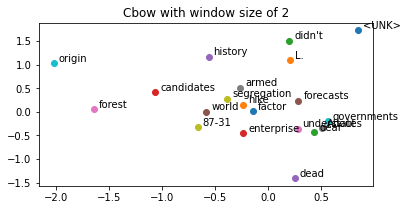

In [64]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Cbow with window size of 2')
plt.show()

In [65]:
import pickle

torch.save(model.state_dict(), "GloveModel.pth")
with open('GloveModel.pkl','wb') as f:
    pickle.dump(model,f)

In [66]:
with open('GloveModel.pkl','rb') as f:
    model_test = pickle.load(f)

In [67]:
from scipy import spatial

def cosine_similarity(word1, word2):
    '''
        cosine_similarity function accepts the embeddings of two words and returns the 
        the degree of similarity between them using scipy.
    '''
    cos_sim = 1 - spatial.distance.cosine(word1, word2)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

In [68]:
#let's try similarity between first and second, and second and third
usual = get_embed('usual')
usually = get_embed('usually')
serious = get_embed('serious')
print(f"usual vs. usually: ",cosine_similarity(usual, usually))
print(f"usually vs. serious: ",cosine_similarity(usually, serious))

usual vs. usually:  -0.38487595319747925
usually vs. serious:  -0.4515998065471649


## 7. Testing

### 7.1 Load the test data

In [93]:
import spacy 
import pandas as pd

nlp = spacy.load('en_core_web_sm')
file =  open('questions-words.txt',mode='r')
question_words = []
for content in file:
  question_words.append(content)

print(question_words[0:10])

[': capital-common-countries\n', 'Athens Greece Baghdad Iraq\n', 'Athens Greece Bangkok Thailand\n', 'Athens Greece Beijing China\n', 'Athens Greece Berlin Germany\n', 'Athens Greece Bern Switzerland\n', 'Athens Greece Cairo Egypt\n', 'Athens Greece Canberra Australia\n', 'Athens Greece Hanoi Vietnam\n', 'Athens Greece Havana Cuba\n']


In [96]:
# Seperate header name and index
seperator = [(idx, sent) for idx, sent in enumerate(question_words) if sent[0] == ':']

In [97]:
seperator

[(0, ': capital-common-countries\n'),
 (507, ': capital-world\n'),
 (5032, ': currency\n'),
 (5899, ': city-in-state\n'),
 (8367, ': family\n'),
 (8874, ': gram1-adjective-to-adverb\n'),
 (9867, ': gram2-opposite\n'),
 (10680, ': gram3-comparative\n'),
 (12013, ': gram4-superlative\n'),
 (13136, ': gram5-present-participle\n'),
 (14193, ': gram6-nationality-adjective\n'),
 (15793, ': gram7-past-tense\n'),
 (17354, ': gram8-plural\n'),
 (18687, ': gram9-plural-verbs\n')]

In [98]:
adjective_to_adverb = question_words[8875:9867]
opposite = question_words[9868:10680]
comparative = question_words[10681:12013]

In [99]:
adjective_to_adverb[0:10]

['amazing amazingly apparent apparently\n',
 'amazing amazingly calm calmly\n',
 'amazing amazingly cheerful cheerfully\n',
 'amazing amazingly complete completely\n',
 'amazing amazingly efficient efficiently\n',
 'amazing amazingly fortunate fortunately\n',
 'amazing amazingly free freely\n',
 'amazing amazingly furious furiously\n',
 'amazing amazingly happy happily\n',
 'amazing amazingly immediate immediately\n']

In [100]:
 opposite[0:10]

['acceptable unacceptable aware unaware\n',
 'acceptable unacceptable certain uncertain\n',
 'acceptable unacceptable clear unclear\n',
 'acceptable unacceptable comfortable uncomfortable\n',
 'acceptable unacceptable competitive uncompetitive\n',
 'acceptable unacceptable consistent inconsistent\n',
 'acceptable unacceptable convincing unconvincing\n',
 'acceptable unacceptable convenient inconvenient\n',
 'acceptable unacceptable decided undecided\n',
 'acceptable unacceptable efficient inefficient\n']

In [101]:
comparative[0:10]

['bad worse big bigger\n',
 'bad worse bright brighter\n',
 'bad worse cheap cheaper\n',
 'bad worse cold colder\n',
 'bad worse cool cooler\n',
 'bad worse deep deeper\n',
 'bad worse easy easier\n',
 'bad worse fast faster\n',
 'bad worse good better\n',
 'bad worse great greater\n']

In [102]:
test_text = adjective_to_adverb + opposite +comparative

In [104]:
test_adj_to_adv = [sentence.split(" ") for sentence in adjective_to_adverb]
test_opposite = [sentence.split(" ") for sentence in opposite]
test_comparative = [sentence.split(" ") for sentence in comparative]
test_set = [sentence.split(" ") for sentence in test_text]

In [105]:
print(test_set[0:5])

[['amazing', 'amazingly', 'apparent', 'apparently\n'], ['amazing', 'amazingly', 'calm', 'calmly\n'], ['amazing', 'amazingly', 'cheerful', 'cheerfully\n'], ['amazing', 'amazingly', 'complete', 'completely\n'], ['amazing', 'amazingly', 'efficient', 'efficiently\n']]


### 7.2 Flatten and get Unique words

In [106]:
flatten = lambda l: [item for sublist in l for item in sublist]
test_vocab = list(set(flatten(test_set)))
test_vocab[0:10]

['simple',
 'ethical',
 'decided',
 'colder\n',
 'apparently',
 'cheerfully\n',
 'unconvincing',
 'distasteful\n',
 'tighter\n',
 'young']

In [107]:
test_word2index = dict()
test_word2index.update({"":  0})
for idx, v in enumerate(test_vocab):
        test_word2index.update({v:  idx + 1})

test_vocab.append('')

test_index2word = {v:k for k, v in test_word2index.items()}

### 7.3 Sematic Testing

In [75]:
def find_analogy(a,b,c,vocabs=vocabs):
    emb_a, emb_b, emb_c = get_embed(a), get_embed(b), get_embed(c)
    vector = emb_b - emb_a + emb_c
    # vector_norm = (vector ** 2).sum() ** (1 / 2)
    # vector = vector / vector_norm
    # print(vector.shape)
    similarity = -1 
    
    for vocab in vocabs:
        if vocab not in [a,b,c]: #ignore input words itself
            current_sim = cosine_similarity(vector,get_embed(vocab))
            if current_sim > similarity:
                similarity = current_sim #update better one
                d = (vocab, similarity)
    return d

In [113]:
find_analogy('amazing','amazingly','apparent')

('judgment', 0.9999979138374329)

In [114]:
def check_accruacy(y, yhat):
    if y == yhat:
        return True
    else:
        return False

def test_accruacy_batch(data):
    counter = 0
    for sent in data:
        label = sent[-1]
        a, b, c = sent[:-1]
        yhat = find_analogy(a, b, c)[0] # It's return in tuple form, so we need to slice to get word
        if check_accruacy(label, yhat) == True:
            counter = counter + 1
    
    return counter

In [117]:
import random

test_list = [test_adj_to_adv, test_opposite,test_comparative]
test_list_name = ['test_adj_to_adv', 'test_opposite','test_comparative']

for idx, current_test in enumerate(test_list):
   sample_list = random.choices(current_test, k=100)
   print(f'Current_test = {test_list_name[idx]}')
   accruacy = test_accruacy_batch(sample_list)
   print(accruacy)

Current_test = test_adj_to_adv
0
Current_test = test_opposite
0
Current_test = test_comparative
0


### 7.4 Syntatic Testing